In [ ]:
!pip install tensorflow
!pip install torch

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, GlobalMaxPool1D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris

In [ ]:
from datasets import load_dataset

ds = load_dataset("dougtrajano/olid-br")

# ANÁLISE EXPLORATÓRIA (EDA)

Offense Target Identification
This level is used to detect if an offensive sentence is targeted to a person or group of people.

Is the offensive text targeted?

TIN Targeted Insult: Targeted insult or threat towards an individual, a group or other.
UNT Untargeted: Non-targeted profanity and swearing.
What is the target of the offense?

IND The offense targets an individual, often defined as “cyberbullying”.
GRP The offense targets a group of people based on ethnicity, gender, sexual
OTH The target can belong to other categories, such as an organization, an event, an issue, etc.

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Carregar o dataset "dougtrajano/olid-br" para um DataFrame pandas
# O dataset 'ds' é um objeto DatasetDict, com 'train', 'validation', 'test'
# split de treino para a análise exploratória
df = pd.DataFrame(ds['train'])

print("="*60)
print("ANÁLISE EXPLORATÓRIA DE DADOS - Dataset OLID-BR")
print("="*60)
print("\nPrimeiras 5 linhas do DataFrame:")
display(df.head())

print("\nInformações do DataFrame:")
df.info()

print("\nEstatísticas descritivas:")
display(df.describe(include='all'))

print("\nContagem de valores únicos por coluna:")
# Excluir a coluna 'toxic_spans' ao calcular valores únicos
display(df.drop(columns=['toxic_spans']).nunique())

print("\nContagem de valores nulos por coluna:")
display(df.isnull().sum())

ANÁLISE EXPLORATÓRIA DE DADOS - Dataset OLID-BR

Primeiras 5 linhas do DataFrame:


,id,text,is_offensive,is_targeted,targeted_type,toxic_spans,health,ideology,insult,lgbtqphobia,other_lifestyle,physical_aspects,profanity_obscene,racism,religious_intolerance,sexism,xenophobia
0,c779826dc43f460cb18e8429ca443477,Pior do que adolescentezinhas de merda...são p...,OFF,UNT,None,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,False,True,False,False,False,True,False,False,True,False
1,a3d7839456ae4258a70298fcf637952e,"Podia ter beijo também, pra ver se o homofóbic...",OFF,UNT,None,"[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 3...",False,False,True,False,False,False,False,False,False,False,False
2,b830374760cc44789f1493c6b228ebc1,"o monark não é racista que filha da putagem, j...",OFF,TIN,GRP,"[36, 37, 38, 39, 40, 41, 42]",False,False,True,False,False,False,False,False,False,False,False
3,73299805588d424fa2905eaf9e616cf1,fudeu minha mãe acabou de chegar em casa e eu ...,OFF,TIN,OTH,"[0, 1, 2, 3, 4, 5, 72, 73, 74]",False,False,True,False,False,False,True,False,False,False,False
4,862cf8f819814e47bb4e7f6b4b0afc73,"Vergonha,ainda segura a bandeira de um país de...",OFF,UNT,None,"[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 6...",False,True,True,True,False,False,False,False,False,False,True



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5214 entries, 0 to 5213
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     5214 non-null   object
 1   text                   5214 non-null   object
 2   is_offensive           5214 non-null   object
 3   is_targeted            5214 non-null   object
 4   targeted_type          2987 non-null   object
 5   toxic_spans            4746 non-null   object
 6   health                 5214 non-null   bool  
 7   ideology               5214 non-null   bool  
 8   insult                 5214 non-null   bool  
 9   lgbtqphobia            5214 non-null   bool  
 10  other_lifestyle        5214 non-null   bool  
 11  physical_aspects       5214 non-null   bool  
 12  profanity_obscene      5214 non-null   bool  
 13  racism                 5214 non-null   bool  
 14  religious_intolerance  5214 non-null   bool  

,id,text,is_offensive,is_targeted,targeted_type,toxic_spans,health,ideology,insult,lgbtqphobia,other_lifestyle,physical_aspects,profanity_obscene,racism,religious_intolerance,sexism,xenophobia
count,5214,5214,5214,5214,2987,4746,5214,5214,5214,5214,5214,5214,5214,5214,5214,5214,5214
unique,5214,5214,2,2,3,2939,2,2,2,2,2,2,2,2,1,2,2
top,fb00df97a9794c899bf527100d589c38,Um papo de quem sabe e uma pesso cabeca dura,OFF,TIN,IND,[],False,False,True,False,False,False,False,False,False,False,False
freq,1,1,4452,3132,1904,647,5095,4298,4192,4933,5113,4963,3481,5145,5214,4868,5118



Contagem de valores únicos por coluna:


,0
id,5214
text,5214
is_offensive,2
is_targeted,2
targeted_type,3
health,2
ideology,2
insult,2
lgbtqphobia,2
other_lifestyle,2



Contagem de valores nulos por coluna:


,0
id,0
text,0
is_offensive,0
is_targeted,0
targeted_type,2227
toxic_spans,468
health,0
ideology,0
insult,0
lgbtqphobia,0


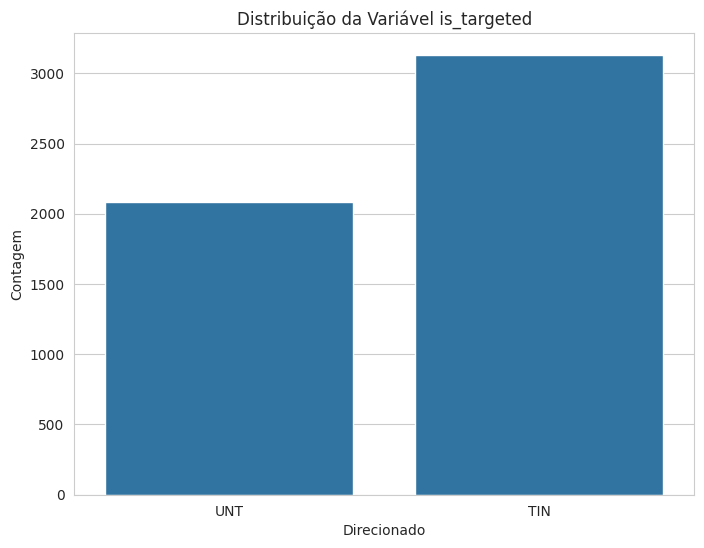


Contagem de cada classe na variável 'is_targeted':


,count
is_targeted,
TIN,3132
UNT,2082


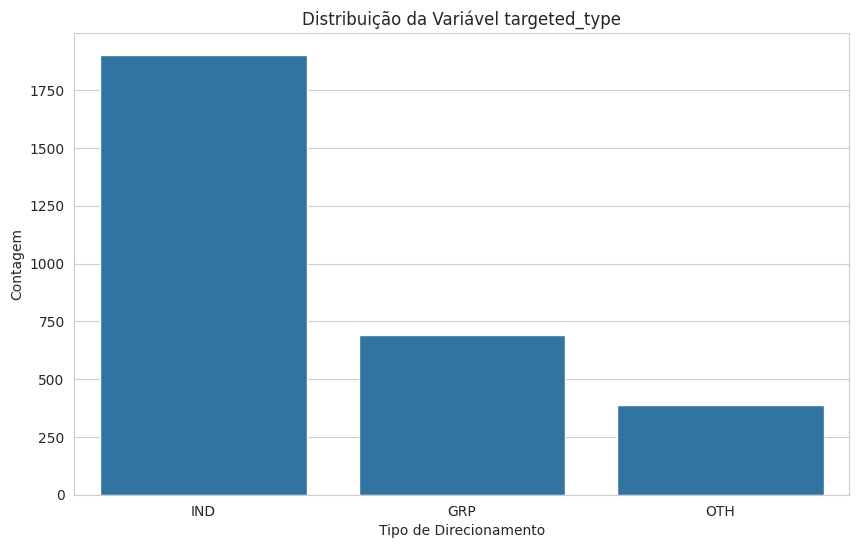


Contagem de cada classe na variável 'targeted_type':


,count
targeted_type,
IND,1904
GRP,693
OTH,390


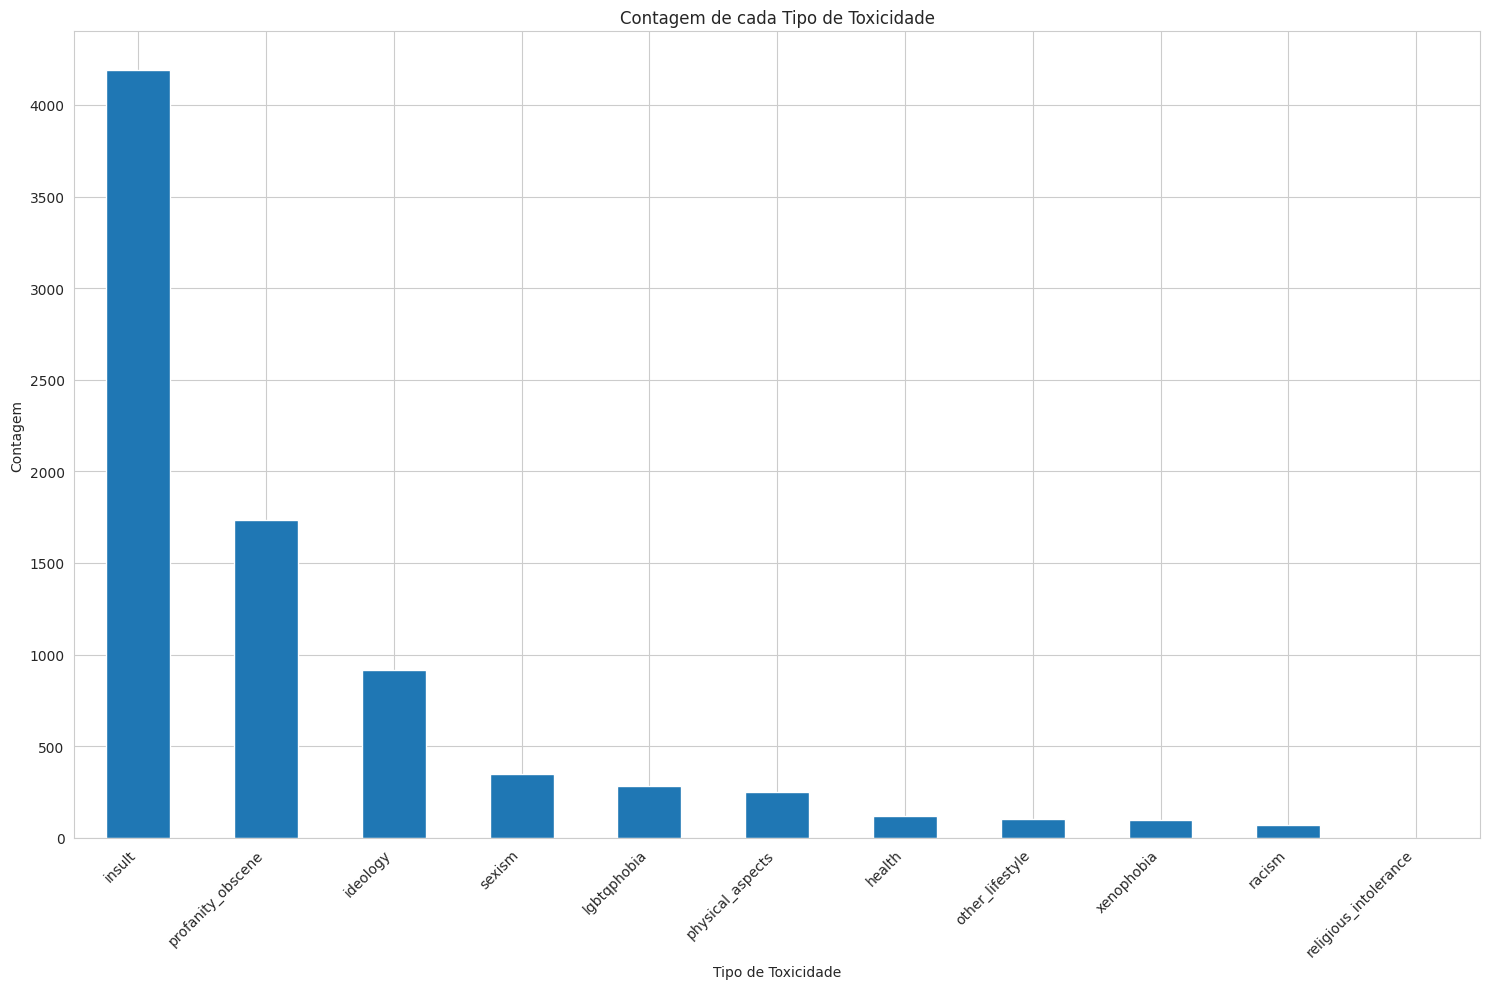


Contagem de cada tipo de toxicidade:


,0
insult,4192
profanity_obscene,1733
ideology,916
sexism,346
lgbtqphobia,281
physical_aspects,251
health,119
other_lifestyle,101
xenophobia,96
racism,69


In [ ]:
# Visualizar a distribuição da variável 'is_targeted'
plt.figure(figsize=(8, 6))
sns.countplot(x='is_targeted', data=df)
plt.title('Distribuição da Variável is_targeted')
plt.xlabel('Direcionado')
plt.ylabel('Contagem')
plt.show()

# Exibir a contagem de cada classe
print("\nContagem de cada classe na variável 'is_targeted':")
display(df['is_targeted'].value_counts())

# Visualizar a distribuição da variável 'targeted_type'
plt.figure(figsize=(10, 6))
sns.countplot(x='targeted_type', data=df, order=df['targeted_type'].value_counts().index)
plt.title('Distribuição da Variável targeted_type')
plt.xlabel('Tipo de Direcionamento')
plt.ylabel('Contagem')
plt.show()

# Exibir a contagem de cada classe
print("\nContagem de cada classe na variável 'targeted_type':")
display(df['targeted_type'].value_counts())

# Visualizar a distribuição das colunas booleanas (tipos de toxicidade)
boolean_cols = ['health', 'ideology', 'insult', 'lgbtqphobia', 'other_lifestyle',
                'physical_aspects', 'profanity_obscene', 'racism',
                'religious_intolerance', 'sexism', 'xenophobia']

plt.figure(figsize=(15, 10))
df[boolean_cols].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Contagem de cada Tipo de Toxicidade')
plt.xlabel('Tipo de Toxicidade')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exibir a contagem de cada tipo de toxicidade
print("\nContagem de cada tipo de toxicidade:")
display(df[boolean_cols].sum().sort_values(ascending=False))

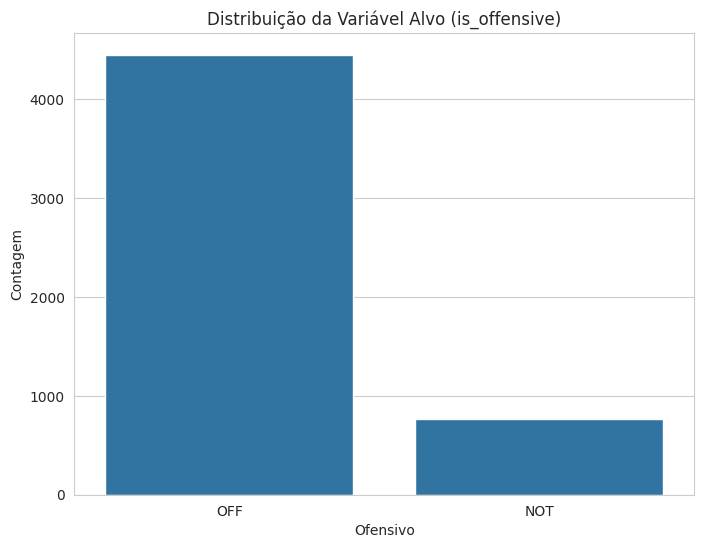


Contagem de cada classe na variável 'is_offensive':


,count
is_offensive,
OFF,4452
NOT,762


In [ ]:
# Visualizar a distribuição da variável alvo 'is_offensive'
plt.figure(figsize=(8, 6))
sns.countplot(x='is_offensive', data=df)
plt.title('Distribuição da Variável Alvo (is_offensive)')
plt.xlabel('Ofensivo')
plt.ylabel('Contagem')
plt.show()

# Exibir a contagem de cada classe
print("\nContagem de cada classe na variável 'is_offensive':")
display(df['is_offensive'].value_counts())

In [ ]:
# 1. Análise mais detalhada do desbalanceamento
print("\n=== ANÁLISE DE DESBALANCEAMENTO ===")
print(f"Proporção is_offensive: {df['is_offensive'].value_counts(normalize=True)}")
print(f"Proporção is_targeted: {df['is_targeted'].value_counts(normalize=True)}")

# 2. Investigar a relação entre variáveis
print("\n=== RELAÇÃO ENTRE VARIÁVEIS ===")
cross_tab = pd.crosstab(df['is_offensive'], df['is_targeted'])
print(cross_tab)

# 3. Análise de toxic_spans
print("\n=== ANÁLISE DE TOXIC SPANS ===")
print(f"Textos sem toxic_spans: {df['toxic_spans'].isna().sum()}")
print(f"Textos com toxic_spans vazios: {(df['toxic_spans'].notna() & df['toxic_spans'].apply(lambda x: len(x) == 0 if isinstance(x, list) else False)).sum()}")


# 4. Verificar overlaps entre tipos de toxicidade
boolean_cols = ['health', 'ideology', 'insult', 'lgbtqphobia', 'other_lifestyle',
                'physical_aspects', 'profanity_obscene', 'racism',
                'religious_intolerance', 'sexism', 'xenophobia']
toxic_overlap = df[boolean_cols].sum(axis=1)
print(f"\nTextos com múltiplos tipos de toxicidade: {(toxic_overlap > 1).sum()}")
print(f"Média de tipos por texto ofensivo: {toxic_overlap[df['is_offensive'] == 'OFF'].mean():.2f}")


=== ANÁLISE DE DESBALANCEAMENTO ===
Proporção is_offensive: is_offensive
OFF    0.853855
NOT    0.146145
Name: proportion, dtype: float64
Proporção is_targeted: is_targeted
TIN    0.60069
UNT    0.39931
Name: proportion, dtype: float64

=== RELAÇÃO ENTRE VARIÁVEIS ===
is_targeted    TIN   UNT
is_offensive            
NOT              0   762
OFF           3132  1320

=== ANÁLISE DE TOXIC SPANS ===
Textos sem toxic_spans: 468
Textos com toxic_spans vazios: 647

Textos com múltiplos tipos de toxicidade: 2762
Média de tipos por texto ofensivo: 1.82


In [ ]:
# Investigar a relação entre toxic_spans e is_offensive
print("\n=== TOXIC SPANS vs IS_OFFENSIVE ===")
toxic_analysis = df.groupby('is_offensive').apply(
    lambda x: pd.Series({
        'total': len(x),
        'with_toxic_spans': x['toxic_spans'].notna().sum(),
        'empty_toxic_spans': (x['toxic_spans'].notna() & x['toxic_spans'].apply(lambda y: len(y) == 0 if isinstance(y, list) else False)).sum(),
        'no_toxic_spans': x['toxic_spans'].isna().sum()
    })
)
print(toxic_analysis)

# Verificar textos OFF com toxic_spans vazios/nulos
offensive_with_issues = df[(df['is_offensive'] == 'OFF') &
                          (df['toxic_spans'].isna() | df['toxic_spans'].apply(lambda y: not isinstance(y, list) or len(y) == 0))]
print(f"\nTextos OFFENSIVOS sem toxic_spans válidos: {len(offensive_with_issues)}")

# Análise da multi-toxicidade por categoria
print("\n=== MULTI-TOXICIDADE DETALHADA ===")
boolean_cols = ['health', 'ideology', 'insult', 'lgbtqphobia', 'other_lifestyle',
                'physical_aspects', 'profanity_obscene', 'racism',
                'religious_intolerance', 'sexism', 'xenophobia']
toxic_counts = df[boolean_cols].sum(axis=1)
for i in range(0, 6):
    count = (toxic_counts == i).sum()
    print(f"Textos com exatamente {i} tipos de toxicidade: {count} ({count/len(df)*100:.1f}%)")

# Verificar overlap entre tipos mais comuns
print("\n=== OVERLAP ENTRE TIPOS PRINCIPAIS ===")
common_toxic = ['insult', 'profanity_obscene', 'ideology', 'sexism']
for i in range(len(common_toxic)):
    for j in range(i+1, len(common_toxic)):
        col1, col2 = common_toxic[i], common_toxic[j]
        overlap = ((df[col1] == True) & (df[col2] == True)).sum()
        print(f"{col1} & {col2}: {overlap} overlaps")


=== TOXIC SPANS vs IS_OFFENSIVE ===
              total  with_toxic_spans  empty_toxic_spans  no_toxic_spans
is_offensive                                                            
NOT             762               294                293             468
OFF            4452              4452                354               0

Textos OFFENSIVOS sem toxic_spans válidos: 354

=== MULTI-TOXICIDADE DETALHADA ===
Textos com exatamente 0 tipos de toxicidade: 766 (14.7%)
Textos com exatamente 1 tipos de toxicidade: 1686 (32.3%)
Textos com exatamente 2 tipos de toxicidade: 2026 (38.9%)
Textos com exatamente 3 tipos de toxicidade: 606 (11.6%)
Textos com exatamente 4 tipos de toxicidade: 105 (2.0%)
Textos com exatamente 5 tipos de toxicidade: 22 (0.4%)

=== OVERLAP ENTRE TIPOS PRINCIPAIS ===
insult & profanity_obscene: 1526 overlaps
insult & ideology: 902 overlaps
insult & sexism: 332 overlaps
profanity_obscene & ideology: 221 overlaps
profanity_obscene & sexism: 166 overlaps
ideology & sexism:

In [ ]:
# Investigar a relação entre toxic_spans vazios e a variável alvo
print("\n=== INVESTIGAÇÃO DOS TOXIC SPANS VAZIOS ===")
empty_toxic_not = df[(df['is_offensive'] == 'NOT') & (df['toxic_spans'].apply(lambda x: isinstance(x, list) and len(x) == 0))]
empty_toxic_off = df[(df['is_offensive'] == 'OFF') & (df['toxic_spans'].apply(lambda x: isinstance(x, list) and len(x) == 0))]

print(f"Textos NOT com toxic_spans vazios: {len(empty_toxic_not)}")
print(f"Textos OFF com toxic_spans vazios: {len(empty_toxic_off)}")

# Verificar se há padrão nos textos OFF sem toxic_spans
print("\n=== EXEMPLOS DE TEXTOS PROBLEMÁTICOS ===")
print("Exemplos de textos OFFENSIVOS sem toxic_spans:")
offensive_no_spans = df[(df['is_offensive'] == 'OFF') & (df['toxic_spans'].isna())]
for i, text in enumerate(offensive_no_spans['text'].head(3)):
    print(f"Exemplo {i+1}: {text}")

print("\nExemplos de textos NOT com toxic_spans vazios:")
not_empty_spans = df[(df['is_offensive'] == 'NOT') & (df['toxic_spans'].apply(lambda x: isinstance(x, list) and len(x) == 0))]
for i, text in enumerate(not_empty_spans['text'].head(3)):
    print(f"Exemplo {i+1}: {text}")

# Análise de comprimento dos textos
print("\n=== ANÁLISE DE COMPRIMENTO DOS TEXTOS ===")
df['text_length'] = df['text'].str.len()
length_stats = df.groupby('is_offensive')['text_length'].describe()
print(length_stats)


=== INVESTIGAÇÃO DOS TOXIC SPANS VAZIOS ===
Textos NOT com toxic_spans vazios: 293
Textos OFF com toxic_spans vazios: 354

=== EXEMPLOS DE TEXTOS PROBLEMÁTICOS ===
Exemplos de textos OFFENSIVOS sem toxic_spans:

Exemplos de textos NOT com toxic_spans vazios:
Exemplo 1: Às vezes eu fico pensando o que leva uma empresa como bur USER fazer um tipo de propaganda como essa Às crianças quando elas forem de maior deixa por elas mesma descobrir a opção sexual delas não é usa uma propaganda para poder incentivar a criança a sua opção sexual Isso é uma degradação da família brasileira
Exemplo 2: Eu não entendo como esse vídeo pode destruir ou chocar um ser vivo ou uma família!? Seu preconceito e ignorância que me chocam.
Exemplo 3: O flow é gigante. Hipócritas geralmente são ótimos acusadores. Sucesso ao flow e espero que o USER procure ser na presença de Deus, um ser humano melhor.

=== ANÁLISE DE COMPRIMENTO DOS TEXTOS ===
               count        mean         std  min   25%   50%    75%  

In [ ]:
# Investigação profunda dos textos OFF com spans vazios
print("\n=== ANÁLISE DOS TEXTOS OFF COM SPANS VAZIOS ===")
offensive_empty_spans = df[(df['is_offensive'] == 'OFF') &
                          (df['toxic_spans'].apply(lambda x: isinstance(x, list) and len(x) == 0))]

print(f"Total de textos OFF com spans vazios: {len(offensive_empty_spans)}")

# Verificar a distribuição de tipos de toxicidade nesses textos
print("\nTipos de toxicidade em textos OFF com spans vazios:")
toxic_counts_off_empty = offensive_empty_spans[boolean_cols].sum().sort_values(ascending=False)
print(toxic_counts_off_empty)

# Exemplos desses textos
print("\nExemplos de textos OFF com spans vazios:")
for i, (idx, row) in enumerate(offensive_empty_spans.head(3).iterrows()):
    print(f"\nExemplo {i+1}:")
    print(f"Texto: {row['text']}")
    print(f"Tipos de toxicidade: {[col for col in boolean_cols if row[col]]}")

# Análise de concordância entre annotators
print("\n=== ANÁLISE DE POSSÍVEIS CONFLITOS ===")
conflict_texts = df[df['toxic_spans'].apply(lambda x: isinstance(x, list) and len(x) == 0)]
print(f"Total de textos com spans vazios (ambas classes): {len(conflict_texts)}")

# Verificar se há padrão nos tipos de toxicidade para spans vazios
print("\nTipos mais comuns em textos com spans vazios:")
conflict_toxicity = conflict_texts[boolean_cols].sum().sort_values(ascending=False)
print(conflict_toxicity)


=== ANÁLISE DOS TEXTOS OFF COM SPANS VAZIOS ===
Total de textos OFF com spans vazios: 354

Tipos de toxicidade em textos OFF com spans vazios:
insult                   320
ideology                  73
profanity_obscene         66
lgbtqphobia               28
sexism                    24
xenophobia                13
other_lifestyle           12
physical_aspects          10
racism                     6
health                     3
religious_intolerance      0
dtype: int64

Exemplos de textos OFF com spans vazios:

Exemplo 1:
Texto: USER é USER ! USER é USER!! Kkkkkkkkkk
Tipos de toxicidade: []

Exemplo 2:
Texto: USER 🌐 o silêncio é o que mais mata
Tipos de toxicidade: ['insult']

Exemplo 3:
Texto: Se ele não tivesse respeito por uma mulher ele xingava ela agora na cara dela como muitos fazem! Parabéns USER
Tipos de toxicidade: ['insult', 'sexism']

=== ANÁLISE DE POSSÍVEIS CONFLITOS ===
Total de textos com spans vazios (ambas classes): 647

Tipos mais comuns em textos com spans vazios:


In [ ]:
mask_off = df['is_offensive'] == 'OFF'
mask_empty_spans = df['toxic_spans'].isna() | (df['toxic_spans'].apply(lambda x: len(x) == 0 if x is not None else True))

off_empty_spans = df[mask_off & mask_empty_spans]

# Lista das colunas booleanas que representam os tipos de toxicidade
boolean_cols = ['health', 'ideology', 'insult', 'lgbtqphobia', 'other_lifestyle',
                'physical_aspects', 'profanity_obscene', 'racism',
                'religious_intolerance', 'sexism', 'xenophobia']

# Vamos olhar para os primeiros 10 textos
print("Exemplos de textos OFFENSIVOS sem toxic_spans válidos:")
for idx, row in off_empty_spans.head(10).iterrows():
    # Identificar os tipos de toxicidade para cada texto
    toxic_types = [col for col in boolean_cols if row[col]]
    print(f"Texto: {row['text']}")
    print(f"Tipos de toxicidade: {toxic_types}")
    print("---")

Exemplos de textos OFFENSIVOS sem toxic_spans válidos:
Texto: USER é USER ! USER é USER!! Kkkkkkkkkk
Tipos de toxicidade: []
---
Texto: USER 🌐 o silêncio é o que mais mata
Tipos de toxicidade: ['insult']
---
Texto: Se ele não tivesse respeito por uma mulher ele xingava ela agora na cara dela como muitos fazem! Parabéns USER
Tipos de toxicidade: ['insult', 'sexism']
---
Texto: USER USER a única visibilidade que temos em midia é com coisas ruins como assassinatos, não é nenhum privilégio isso cara, só estamos tentando mudar isso e ser representados como pessoas normais, casais normais e só isso. Essa discursao toda por causa de um video onde mostra todas as formas de amor... É foda
Tipos de toxicidade: ['insult', 'profanity_obscene']
---
Texto: USER eu lamento muito pelo que fizeram com vc. Eu não vejo um USER nazista. Vejo um USER idealista que defende o direito de livre expressão. Roubaram justamente a tua causa de vida. Isso sim foi criminoso. No dia que houver liberdade de expressão,

In [ ]:
off_empty_spans.to_csv('textos_OFF_sem_spans.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os 354 casos problemáticos
problem_cases = df[(df['is_offensive'] == 'OFF') &
                   (df['toxic_spans'].isna() | (df['toxic_spans'].astype(str) == '[]'))]

print(f"Total de casos OFF sem toxic_spans: {len(problem_cases)}")

Total de casos OFF sem toxic_spans: 354


Distribuição de tipos de toxicidade nos casos problemáticos:
toxic_type
insult               320
ideology              73
profanity_obscene     66
lgbtqphobia           28
sexism                24
xenophobia            13
other_lifestyle       12
physical_aspects      10
racism                 6
health                 3
Name: count, dtype: int64


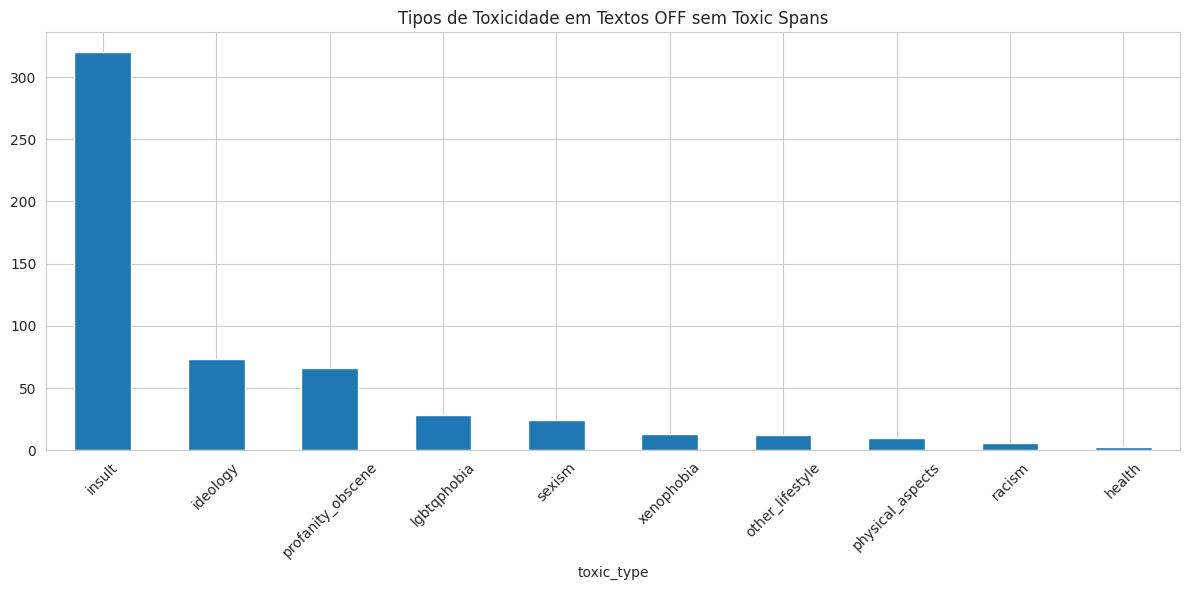

In [ ]:
# Analisar distribuição dos tipos de toxicidade nesses casos
toxic_types_analysis = []
boolean_cols = ['health', 'ideology', 'insult', 'lgbtqphobia', 'other_lifestyle',
                'physical_aspects', 'profanity_obscene', 'racism',
                'religious_intolerance', 'sexism', 'xenophobia']

for idx, row in problem_cases.iterrows():
    # Identify the toxic types for each row
    toxic_types = [col for col in boolean_cols if row[col]]
    if toxic_types: # Only add rows with at least one toxic type
        for toxic_type in toxic_types:
            toxic_types_analysis.append({
                'text': row['text'],
                'toxic_type': toxic_type,
                'text_length': len(row['text'])
            })

toxic_types_df = pd.DataFrame(toxic_types_analysis)

if not toxic_types_df.empty:
    toxic_type_counts = toxic_types_df['toxic_type'].value_counts()

    print("Distribuição de tipos de toxicidade nos casos problemáticos:")
    print(toxic_type_counts)

    # Plot
    plt.figure(figsize=(12, 6))
    toxic_type_counts.plot(kind='bar')
    plt.title('Tipos de Toxicidade em Textos OFF sem Toxic Spans')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Não há textos problemáticos com tipos de toxicidade associados para análise.")

In [ ]:
def analyze_patterns(problem_cases):
    patterns = {
        'contains_user_mention': problem_cases['text'].str.contains('USER', case=False).sum(),
        'contains_laughter': problem_cases['text'].str.contains(r'\b(k+a+|h+a+|r+s+)\b', case=False, regex=True).sum(),
        'contains_emoji': problem_cases['text'].str.count(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]').gt(0).sum(),
        'short_texts': problem_cases[problem_cases['text'].str.len() < 20].shape[0],
        'contains_irony_indicators': problem_cases['text'].str.contains(r'\b(parabéns|obrigado|lindo|maravilhoso)\b', case=False, regex=True).sum(),
    }

    return patterns

patterns = analyze_patterns(problem_cases)
print("Padrões encontrados:")
for pattern, count in patterns.items():
    print(f"{pattern}: {count} ({count/len(problem_cases)*100:.1f}%)")

Padrões encontrados:
contains_user_mention: 229 (64.7%)
contains_laughter: 0 (0.0%)
contains_emoji: 28 (7.9%)
short_texts: 2 (0.6%)
contains_irony_indicators: 10 (2.8%)


In [ ]:
import re
from collections import Counter

def deep_text_analysis(texts):
    # Análise de características linguísticas
    all_words = []
    all_sentences = []

    for text in texts:
        # Tokenização simples
        words = re.findall(r'\b\w+\b', text.lower())
        all_words.extend(words)
        all_sentences.append(text)

    # Palavras mais frequentes
    word_freq = Counter(all_words).most_common(20)

    # Análise de comprimento
    text_lengths = [len(text) for text in texts]
    word_counts = [len(re.findall(r'\b\w+\b', text)) for text in texts]

    return {
        'common_words': word_freq,
        'avg_text_length': np.mean(text_lengths),
        'avg_word_count': np.mean(word_counts),
        'word_freq': word_freq
    }

analysis = deep_text_analysis(problem_cases['text'])
print("Análise linguística detalhada:")
print(f"Comprimento médio do texto: {analysis['avg_text_length']:.1f} caracteres")
print(f"Contagem média de palavras: {analysis['avg_word_count']:.1f}")
print("\n20 palavras mais frequentes:")
for word, freq in analysis['common_words']:
    print(f"  {word}: {freq}")

Análise linguística detalhada:
Comprimento médio do texto: 157.3 caracteres
Contagem média de palavras: 28.3

20 palavras mais frequentes:
  user: 815
  e: 284
  que: 276
  de: 272
  a: 247
  o: 227
  é: 176
  não: 170
  se: 126
  um: 102
  com: 89
  do: 88
  uma: 79
  eu: 72
  mais: 65
  da: 61
  tem: 61
  no: 56
  ele: 54
  na: 54


In [ ]:
# Criar arquivo detalhado para análise manual
analysis_report = []

# Lista das colunas booleanas que representam os tipos de toxicidade
boolean_cols = ['health', 'ideology', 'insult', 'lgbtqphobia', 'other_lifestyle',
                'physical_aspects', 'profanity_obscene', 'racism',
                'religious_intolerance', 'sexism', 'xenophobia']


for idx, row in problem_cases.iterrows():
    # Identify the toxic types for each row
    toxic_types = [col for col in boolean_cols if row[col]]
    analysis_report.append({
        'text_id': idx,
        'text': row['text'],
        'toxic_types': ', '.join(toxic_types),
        'is_targeted': row.get('is_targeted', ''),
        'targeted_type': row.get('targeted_type', ''),
        'text_length': len(row['text']),
        'word_count': len(row['text'].split()),
        'has_user_mention': 'USER' in row['text'],
        'has_emoji': bool(re.search(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF]', row['text'])),
        'has_laughter': bool(re.search(r'\b(k+a+|h+a+|r+s+)\b', row['text'].lower())),
        'potential_irony': bool(re.search(r'\b(parabéns|obrigado|lindo|maravilhoso)\b', row['text'].lower()))
    })

analysis_df = pd.DataFrame(analysis_report)

# Exportar para CSV
analysis_df.to_csv('analise_casos_problematicos.csv', index=False, encoding='utf-8-sig')

print(f"Arquivo exportado com {len(analysis_df)} casos para análise manual")

Arquivo exportado com 354 casos para análise manual


In [ ]:
# Comparar com casos OFF que têm toxic_spans válidos
valid_cases = df[(df['is_offensive'] == 'OFF') &
                 (df['toxic_spans'].notna()) &
                 (df['toxic_spans'].astype(str) != '[]')]

print("COMPARAÇÃO: Problemáticos vs Válidos")
print(f"Problemáticos: {len(problem_cases)} casos")
print(f"Válidos: {len(valid_cases)} casos")

# Comparar comprimento médio
print(f"\nComprimento médio - Problemáticos: {problem_cases['text'].str.len().mean():.1f}")
print(f"Comprimento médio - Válidos: {valid_cases['text'].str.len().mean():.1f}")

# Comparar distribuição de tipos de toxicidade
boolean_cols = ['health', 'ideology', 'insult', 'lgbtqphobia', 'other_lifestyle',
                'physical_aspects', 'profanity_obscene', 'racism',
                'religious_intolerance', 'sexism', 'xenophobia']

problematic_toxic_dist = problem_cases[boolean_cols].sum()
valid_toxic_dist = valid_cases[boolean_cols].sum()

comparison_df = pd.DataFrame({
    'problematicos': problematic_toxic_dist,
    'validos': valid_toxic_dist
}).fillna(0)

comparison_df['ratio'] = comparison_df['problematicos'] / comparison_df['validos']
print("\nRazão de frequência (Problemáticos/Válidos) por tipo:")
print(comparison_df['ratio'].sort_values(ascending=False))

COMPARAÇÃO: Problemáticos vs Válidos
Problemáticos: 354 casos
Válidos: 4098 casos

Comprimento médio - Problemáticos: 157.3
Comprimento médio - Válidos: 119.5

Razão de frequência (Problemáticos/Válidos) por tipo:
xenophobia               0.156627
other_lifestyle          0.134831
lgbtqphobia              0.110672
racism                   0.095238
ideology                 0.086595
insult                   0.082645
sexism                   0.074534
physical_aspects         0.041494
profanity_obscene        0.039592
health                   0.025862
religious_intolerance         NaN
Name: ratio, dtype: float64


In [ ]:
def generate_recommendations(analysis_results):
    recommendations = []

    if analysis_results['patterns']['contains_user_mention'] > len(problem_cases) * 0.5:
        recommendations.append("Muitos casos contêm menções USER - considerar se são realmente ofensivos")

    if analysis_results['patterns']['contains_laughter'] > len(problem_cases) * 0.3:
        recommendations.append("Risadas frequentes - verificar se são ofensas veladas/ironia")

    if analysis_results['patterns']['short_texts'] > len(problem_cases) * 0.4:
        recommendations.append("Muitos textos curtos - difícil identificar spans específicos")

    # Check for a high count of 'insult' in problematic cases
    if 'insult' in analysis_results.get('toxic_type_distribution', {}):
        if analysis_results['toxic_type_distribution']['insult'] > len(problem_cases) * 0.5:
             recommendations.append("Alta frequência de 'insult' em casos problemáticos - pode indicar anotação inconsistente ou dificuldade em spans para insultos genéricos")


    return recommendations

# Executar todas as análises
boolean_cols = ['health', 'ideology', 'insult', 'lgbtqphobia', 'other_lifestyle',
                'physical_aspects', 'profanity_obscene', 'racism',
                'religious_intolerance', 'sexism', 'xenophobia']

full_analysis = {
    'problem_cases_count': len(problem_cases),
    'patterns': analyze_patterns(problem_cases),
    'linguistic_analysis': deep_text_analysis(problem_cases['text']),
    'toxic_type_distribution': problem_cases[boolean_cols].sum().to_dict() # Calculate distribution from boolean columns
}

recommendations = generate_recommendations(full_analysis)

print("\n=== RECOMENDAÇÕES ===")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")


=== RECOMENDAÇÕES ===
1. Muitos casos contêm menções USER - considerar se são realmente ofensivos
2. Alta frequência de 'insult' em casos problemáticos - pode indicar anotação inconsistente ou dificuldade em spans para insultos genéricos


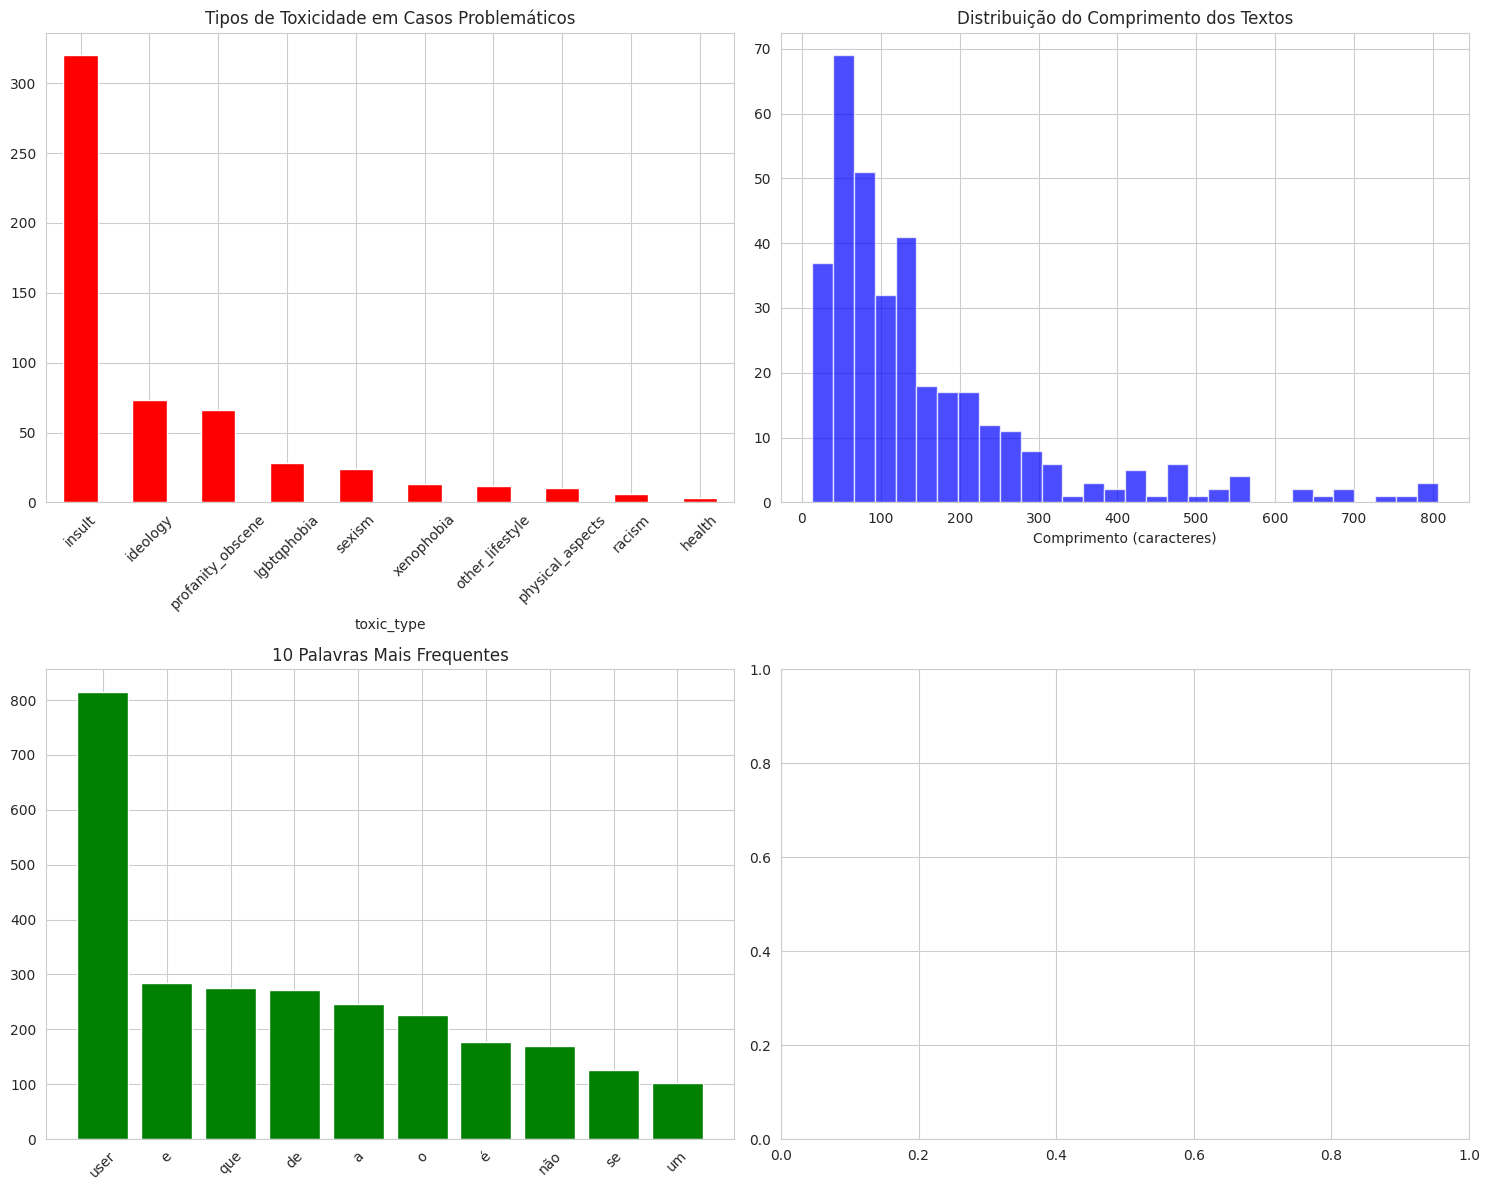

In [ ]:
# Criar dashboard visual
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribuição de tipos de toxicidade
toxic_type_counts.plot(kind='bar', ax=axes[0,0], color='red')
axes[0,0].set_title('Tipos de Toxicidade em Casos Problemáticos')
axes[0,0].tick_params(axis='x', rotation=45)

# Distribuição de comprimento
problem_cases['text_length'] = problem_cases['text'].str.len()
axes[0,1].hist(problem_cases['text_length'], bins=30, alpha=0.7, color='blue')
axes[0,1].set_title('Distribuição do Comprimento dos Textos')
axes[0,1].set_xlabel('Comprimento (caracteres)')

# Palavras mais frequentes
common_words = analysis['common_words'][:10]
words, counts = zip(*common_words)
axes[1,0].bar(words, counts, color='green')
axes[1,0].set_title('10 Palavras Mais Frequentes')
axes[1,0].tick_params(axis='x', rotation=45)

# Categorias problemáticas
if 'category_counts' in locals():
    categories, cat_counts = zip(*category_counts.most_common(8))
    axes[1,1].bar(categories, cat_counts, color='orange')
    axes[1,1].set_title('Categorias de Casos Problemáticos')
    axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# LIMPEZA DE DADOS

In [ ]:
import re

def limpar_texto(texto):
    """
    Função auxiliar para limpar o texto bruto.
    """
    # Converte para minúsculas
    texto = texto.lower()

    # Remove menções 'USER', 'URL', 'HTTP' e 'RT' (de retweets)
    texto = re.sub(r'\b(user|url|http\S+|rt)\b', '', texto)

    # Remove emojis (um range comum para Unicode)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    texto = emoji_pattern.sub(r'', texto)

    # Remove caracteres não-alfabéticos (pontuação, números, etc.),
    # mas mantém letras com acentos (importante para português)
    texto = re.sub(r'[^a-zA-Záàâãéèêíïóôõöúçñ\s]', '', texto)

    # Remove padrões de risadas (kkk, haha, rsrs)
    texto = re.sub(r'\b(k{2,}|h{2,}|r{1,}s{1,})\b', '', texto)

    # Remove espaços extras criados pelas remoções
    texto = re.sub(r'\s+', ' ', texto).strip()

    return texto

def ajustar_dados(df):
    """
    Aplica limpeza e pré-processamento ao DataFrame OLID-BR com base na EDA.

    Ajustes realizados:
    1. Cria uma cópia para evitar sobreescrever o original.
    2. Remove a coluna 'religious_intolerance' (variância zero).
    3. Preenche valores nulos em 'targeted_type' com 'NA' (Não Aplicável).
    4. Identifica e remove linhas 'OFF' contraditórias (sem toxic_spans válidos).
    5. ADICIONADO: Aplica a limpeza de texto (minúsculas, remove USER, pontuação)
       e cria a coluna 'texto_limpo'.
    """

    print(f"Iniciando ajuste. Tamanho original do df: {len(df)}")

    # 1. Criar uma cópia
    df_limpo = df.copy()

    # 2. Remover coluna 'religious_intolerance' (valor único)
    if 'religious_intolerance' in df_limpo.columns:
        df_limpo = df_limpo.drop(columns=['religious_intolerance'])
        print(" -> Coluna 'religious_intolerance' removida.")

    # 3. Preencher nulos em 'targeted_type'
    if 'targeted_type' in df_limpo.columns:
        df_limpo['targeted_type'] = df_limpo['targeted_type'].fillna('NA')
        print(" -> Valores nulos em 'targeted_type' preenchidos com 'NA'.")

    # 4. Remover linhas problemáticas (OFF mas com spans inválidos)

    # Máscara para 'is_offensive' == 'OFF'
    mask_off = df_limpo['is_offensive'] == 'OFF'

    # Máscara para spans inválidos (Nulos OU listas vazias '[]')
    mask_spans_invalidos = df_limpo['toxic_spans'].apply(
        lambda x: x is None or (isinstance(x, (list, np.ndarray)) and len(x) == 0)
    )

    # Encontrar os índices das linhas que satisfazem AMBAS as condições
    indices_problematicos = df_limpo[mask_off & mask_spans_invalidos].index

    if len(indices_problematicos) > 0:
        print(f" -> Encontradas {len(indices_problematicos)} linhas 'OFF' com spans inválidos. Removendo...")
        # Remover essas linhas
        df_limpo = df_limpo.drop(indices_problematicos)

    # --- ETAPA 5: APLICA A LIMPEZA DE TEXTO ---
    print(" -> Aplicando limpeza de texto (lowercase, remoção de USER, pontuação)...")

    # Verifica se a coluna 'text' existe antes de aplicar
    if 'text' in df_limpo.columns:
        df_limpo['texto_limpo'] = df_limpo['text'].apply(limpar_texto)
        print(" -> Coluna 'texto_limpo' criada com sucesso.")
    else:
        print(" -> AVISO: Coluna 'text' não encontrada para limpeza.")


    print(f"Ajuste concluído. Tamanho final do df: {len(df_limpo)}\n")
    return df_limpo

In [ ]:
# Carregar os dados do dataset 'ds' em DataFrames
df_train = pd.DataFrame(ds['train'])
df_test = pd.DataFrame(ds['test'])

# Aplicar a função de limpeza
df_train_limpo = ajustar_dados(df_train)
df_test_limpo = ajustar_dados(df_test)

# Verificar os resultados
print("=== Verificação Pós-Limpeza ===")
print(f"Tamanho original (treino): {len(df_train)} | Tamanho limpo: {len(df_train_limpo)}")
print(f"Tamanho original (teste): {len(df_test)} | Tamanho limpo: {len(df_test_limpo)}")

Iniciando ajuste. Tamanho original do df: 5214
 -> Coluna 'religious_intolerance' removida.
 -> Valores nulos em 'targeted_type' preenchidos com 'NA'.
 -> Encontradas 354 linhas 'OFF' com spans inválidos. Removendo...
 -> Aplicando limpeza de texto (lowercase, remoção de USER, pontuação)...
 -> Coluna 'texto_limpo' criada com sucesso.
Ajuste concluído. Tamanho final do df: 4860

Iniciando ajuste. Tamanho original do df: 1738
 -> Coluna 'religious_intolerance' removida.
 -> Valores nulos em 'targeted_type' preenchidos com 'NA'.
 -> Encontradas 126 linhas 'OFF' com spans inválidos. Removendo...
 -> Aplicando limpeza de texto (lowercase, remoção de USER, pontuação)...
 -> Coluna 'texto_limpo' criada com sucesso.
Ajuste concluído. Tamanho final do df: 1612

=== Verificação Pós-Limpeza ===
Tamanho original (treino): 5214 | Tamanho limpo: 4860
Tamanho original (teste): 1738 | Tamanho limpo: 1612


# TOKENIZAÇAO

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np


num_palavras = 50000 #anotação pessoal: pega 20k palavras principais e únicas, pode aumentar pra mais, mas tem risco de ruido, tbm pode botar menos)
tokenizer = Tokenizer(num_words=num_palavras,
                      oov_token="<UNK>") #unk para que o modelo identifique palavras novas sem quebrar

coluna_de_texto = 'text'
coluna_target = 'is_offensive'

X_train = df_train_limpo[coluna_de_texto]
y_train = df_train_limpo[coluna_target]
X_test = df_test_limpo[coluna_de_texto]
y_test = df_test_limpo[coluna_target]

#print(y_train.value_counts())
label_map = {
    'OFF': 1,
    'NOT': 0
}

y_train = y_train.map(label_map)
y_test = y_test.map(label_map)

tokenizer.fit_on_texts(X_train)

#transformar token em sequencia
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length= 100
X_train_pad = pad_sequences(
    X_train_seq,
    maxlen=max_length,
    padding='pre',
    truncating='pre' #selecionado pre devido ao "esquecimento" do lstms
)
X_test_pad = pad_sequences(
    X_test_seq,
    maxlen=max_length,
    padding='pre',
    truncating='pre'
)

# ARQUITETURA

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.pt.300.vec.gz

--2025-11-02 15:15:21--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.pt.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.171.22.33, 3.171.22.68, 3.171.22.118, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.171.22.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1271093660 (1.2G) [binary/octet-stream]
Saving to: ‘cc.pt.300.vec.gz’

cc.pt.300.vec.gz    100%[===================>]   1.18G  66.8MB/s    in 18s     

2025-11-02 15:15:39 (67.7 MB/s) - ‘cc.pt.300.vec.gz’ saved [1271093660/1271093660]



In [ ]:
import gzip
import numpy as np
import pandas as pd

embedding_index= {}
# Use gzip.open to read the compressed file
try:
    with gzip.open('/content/cc.pt.300.vec.gz', 'rt', encoding='utf-8', errors='ignore') as f:
      next(f) # Skip the header line
      for linha in f:
        valores = linha.split()
        palavra = valores[0]

        try:
            vetor = np.asarray(valores[1:], dtype='float32')
            if len(vetor) == dimensao_embedding:
              embedding_index[palavra] = vetor
        except ValueError:
          pass

    print("Embedding index loaded successfully.")

except EOFError:
    print("Erro: O arquivo '/content/cc.pt.300.vec.gz' parece estar corrompido ou incompleto. Por favor, verifique o arquivo.")
except FileNotFoundError:
    print("Erro: O arquivo '/content/cc.pt.300.vec.gz' não foi encontrado. Certifique-se de que o caminho do arquivo está correto.")
except Exception as e:
  print(f"Ocorreu um erro ao ler o arquivo: {e}")

if embedding_index:
    vocabulario = tokenizer.word_index
    length_vocabulario = len(vocabulario) +1
    dimensao_embedding = 300

    embedding_matrix = np.zeros((length_vocabulario, dimensao_embedding))

    palavras_no_vocab = 0
    palavras_fora = 0

    for palavra, i in vocabulario.items():
      vetor_embedding = embedding_index.get(palavra)

      if vetor_embedding is not None:
        embedding_matrix[i] = vetor_embedding
        palavras_no_vocab +=1
      else:
        palavras_fora +=1

    print(f"Palavras encontradas no vocabulário de embeddings: {palavras_no_vocab}")
    print(f"Palavras no vocabulário do tokenizer não encontradas no embedding (OOV): {palavras_fora}")
else:
    print("Não foi possível carregar o índice de embeddings. A matriz de embedding não será criada.")

KeyboardInterrupt: 

In [ ]:
length_vocabulario = len(tokenizer.word_index)+1
dimensao_embedding = 300
max_length = 100

model = Sequential()

model.add(Embedding(input_dim=length_vocabulario,
                    output_dim=dimensao_embedding,
                    weights=[embedding_matrix], #matrix criada
                    input_length=max_length,
                    trainable=False #congela camada
                    ))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(GlobalMaxPool1D()) #pega valor mais importante
model.add(Dense(units=32, activation='relu')) #camada oculta, encontra padrões e combinaçoes. pode alterar pra cima ou pra baixo.
model.add(Dropout(0.5)) #tentar evitar overfitting
model.add(Dense(units=1, activation='sigmoid')) #camada de saída, 1/0

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │     4,107,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,107,600 (15.67 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,107,600 (15.67 MB)

In [ ]:
import tensorflow as tf

model.compile(
    optimizer='adam', #ajusta os pesos. adam é o padrao. pode trocar se necessario
    loss='binary_crossentropy', #para classificacoes binarias
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)

batch_size = 32 #ve x exemplos de cada vez. nesse caso ele olha 32 por vez)
epochs = 10 # x vezes que o modelo passa pelo ds inteiro.

histoy = model.fit( #salva a saida de treino em uma variavel
    X_train_pad,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test_pad, y_test) #surpeende o modelo com uma prova com os dados de teste
)

#loss e val_loss tem que cair apos validation_data. se loss cai e val_loss sobre é overfitting

Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - accuracy: 0.8355 - loss: 0.4896 - precision_2: 0.8472 - recall_2: 0.9833 - val_accuracy: 0.8424 - val_loss: 0.4177 - val_precision_2: 0.8424 - val_recall_2: 1.0000
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.8401 - loss: 0.4221 - precision_2: 0.8402 - recall_2: 0.9998 - val_accuracy: 0.8418 - val_loss: 0.3911 - val_precision_2: 0.8423 - val_recall_2: 0.9993
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.8481 - loss: 0.3849 - precision_2: 0.8481 - recall_2: 1.0000 - val_accuracy: 0.8462 - val_loss: 0.3681 - val_precision_2: 0.8473 - val_recall_2: 0.9971
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.8489 - loss: 0.3553 - precision_2: 0.8497 - recall_2: 0.9968 - val_accuracy: 0.8499 - val_loss: 0.3406 - val_precision_2: 0.8600 - val_recall_2: 0.9816
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.8585 - loss: 0.3244 - precision_2: 0.8652 - rec

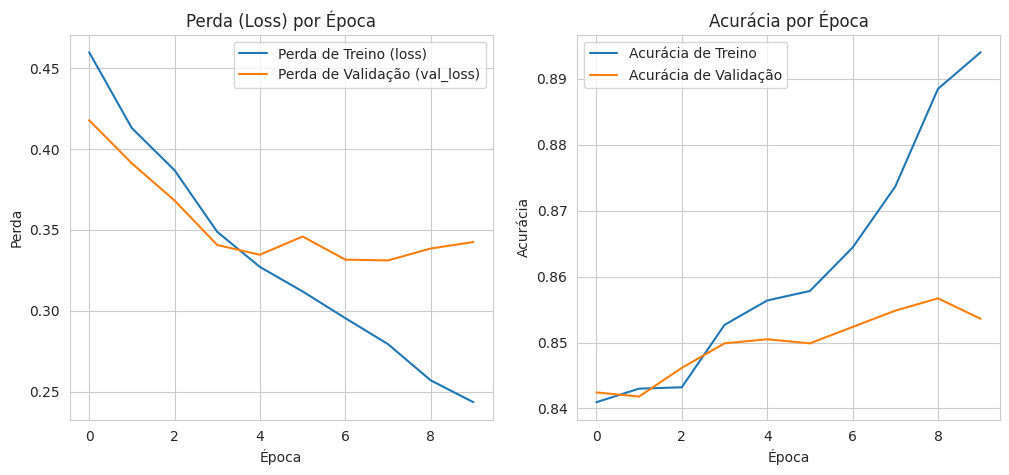

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, gráfico 1
plt.plot(histoy.history['loss'], label='Perda de Treino (loss)')
plt.plot(histoy.history['val_loss'], label='Perda de Validação (val_loss)')
plt.title('Perda (Loss) por Época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

# --- Gráfico 2: Acurácia ---
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, gráfico 2
plt.plot(histoy.history['accuracy'], label='Acurácia de Treino')
plt.plot(histoy.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.show()